In [1]:
%matplotlib inline
import pandas as pd
import csv as csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
import matplotlib
import matplotlib.pylab as pl
from matplotlib import rcParams
import sqlite3

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
conn = sqlite3.connect('../jan13.db')

In [3]:
with open('../queries/value_demand.sql') as query:
    ds = pd.read_sql(query.read(),conn)

In [4]:
ds.head()

,medallion,pu_time,do_time,pu_lon,pu_lat,do_lon,do_lat,tot_amount,duration
0,895B94C2A676652890372A1DA0F5340A,2013-01-27 04:06:00,2013-01-27 04:22:00,-73.992729,40.725338,-73.952171,40.780514,25.700000,960
1,BBADB9E83DB1D9E01C5B09CC019A3B59,2013-01-08 17:41:00,2013-01-08 17:49:00,-73.979706,40.766026,-73.971725,40.781860,10.000000,480
2,EDC498F8AB44E4697ECB239CF11E001F,2013-01-13 14:57:00,2013-01-13 15:21:00,-73.976303,40.765518,-73.996658,40.715321,23.300000,1440
3,EC240A6DAE0C81C9CAA98649C9CD220B,2013-01-16 18:37:11,2013-01-16 18:43:41,-74.005943,40.735981,-73.992767,40.745438,9.409691,390
4,D6981DB303359568589744CDAF39237C,2013-01-09 20:32:00,2013-01-09 20:40:00,-74.004837,40.757092,-73.985382,40.753506,10.073625,480


In [5]:
len(ds)

11444817

In [6]:
len(ds.medallion.unique())

13265

In [7]:
ds['pu_time'] = pd.to_datetime(ds['pu_time'])
ds['do_time'] = pd.to_datetime(ds['do_time'])

In [8]:
holidays = [1,21,5,6,12,13,19,20,26,27]

In [9]:
ds.pu_time.map(lambda x: x.month).unique()

array([1])

In [9]:
wd = ds[(ds.pu_time.map(lambda x: x.day).map(lambda y: y not in holidays))==1]

In [10]:
wd['trip_value'] = wd['tot_amount'] / (wd['duration'] / 3600)

/Users/robertogobbetti/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
wd.head()

,medallion,pu_time,do_time,pu_lon,pu_lat,do_lon,do_lat,tot_amount,duration,trip_value
1,BBADB9E83DB1D9E01C5B09CC019A3B59,2013-01-08 17:41:00,2013-01-08 17:49:00,-73.979706,40.766026,-73.971725,40.781860,10.000000,480,75.000000
3,EC240A6DAE0C81C9CAA98649C9CD220B,2013-01-16 18:37:11,2013-01-16 18:43:41,-74.005943,40.735981,-73.992767,40.745438,9.409691,390,86.858687
4,D6981DB303359568589744CDAF39237C,2013-01-09 20:32:00,2013-01-09 20:40:00,-74.004837,40.757092,-73.985382,40.753506,10.073625,480,75.552184
5,DA9EA8C2AF1D956B483697B6590CF793,2013-01-30 20:29:00,2013-01-30 20:43:00,-74.005623,40.705986,-73.998665,40.754379,20.549025,840,88.067251
7,99A42812E64BD9D2DACBFFF38FF92EEA,2013-01-17 18:02:00,2013-01-17 18:46:00,-73.790710,40.645287,-73.963226,40.718498,60.000000,2640,81.818182


In [12]:
countbyhour = wd.groupby([wd.pu_time.map(lambda x: x.hour)]).aggregate({'medallion': pd.Series.nunique})

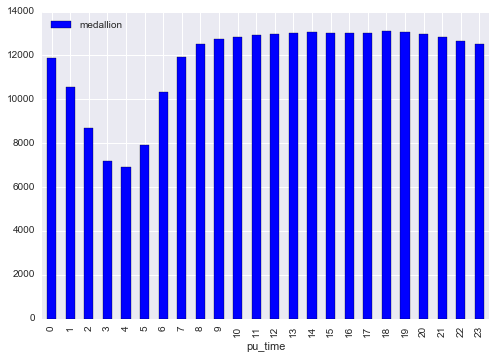

In [13]:
countbyhour.plot.bar()

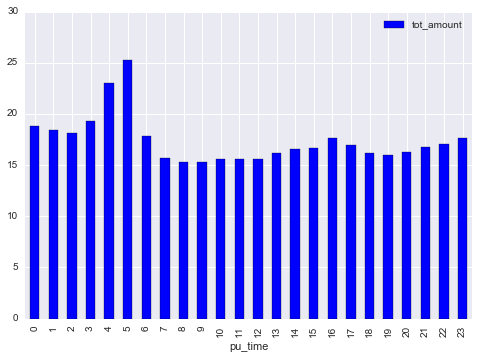

In [14]:
cashbyhour = wd.groupby([wd.pu_time.map(lambda x: x.hour)]).aggregate({'tot_amount':'mean'})
cashbyhour.plot.bar()

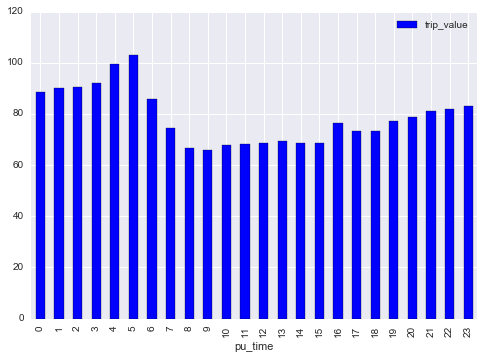

In [15]:
valuebyhour = wd.groupby([wd.pu_time.map(lambda x: x.hour)]).aggregate({'trip_value':'mean'})
valuebyhour.plot.bar()

In [16]:
uniquevaluebyhour = wd.groupby([wd.pu_time.map(lambda x: x.hour)]).aggregate({'trip_value':'mean','medallion': pd.Series.nunique})

In [17]:
uniquevaluebyhour.head()

,trip_value,medallion
pu_time,,
0,88.496608,11904
1,90.118094,10583
2,90.541890,8683
3,91.952871,7198
4,99.665415,6929


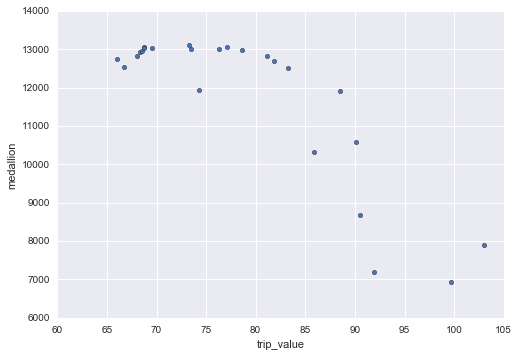

In [18]:
uniquevaluebyhour.plot.scatter(x='trip_value', y='medallion')

In [67]:
#trythis = wd.groupby([pd.cut(wd.pu_lat,100),pd.cut(wd.pu_lon,100)]).trip_value.mean().unstack().iloc[::-1]

In [68]:
#rcParams['figure.figsize'] = (16,14) #Size of figure

#ax = sns.heatmap(trythis, cmap='YlOrRd')#, vmax = 100, vmin = 40)

#ax.axes.get_yaxis().set_visible(False)
#ax.axes.get_xaxis().set_visible(False)
#ax.patch.set_facecolor('white')

In [29]:
#try_again = wd.groupby([pd.cut(wd.pu_lat,200),pd.cut(wd.pu_lon,200)])

In [30]:
#tt = try_again.aggregate({'trip_value':lambda x: x.mean() if x.count()>5 else np.nan}).unstack().iloc[::-1]

In [31]:
#rcParams['figure.figsize'] = (16,14) #Size of figure

#ax = sns.heatmap(tt, cmap='YlOrRd',vmin=50, vmax = 130)

#ax.axes.get_yaxis().set_visible(False)
#ax.axes.get_xaxis().set_visible(False)
#ax.patch.set_facecolor('white')

In [33]:
bythehour = wd.groupby([wd.pu_time.map(lambda x: x.hour),pd.cut(wd.pu_lat,150),pd.cut(wd.pu_lon,150)])

In [34]:
#bth = bythehour.aggregate({'trip_value':lambda x: x.mean() if x.count()>20 else np.nan}).unstack().iloc[::-1]

In [35]:
#rcParams['figure.figsize'] = (16,14) #Size of figure

#ax = sns.heatmap(bth.loc[12,:], cmap='YlOrRd',vmin=50, vmax = 150)

#ax.axes.get_yaxis().set_visible(False)
#ax.axes.get_xaxis().set_visible(False)
#ax.patch.set_facecolor('white')

In [36]:
new_bth = bythehour.aggregate({'trip_value':lambda x: x.mean() if x.count()>20 else np.nan}).reset_index()

In [37]:
new_bth.head()

,pu_time,pu_lat,pu_lon,trip_value
0,0,"(40.61, 40.612]","(-73.931, -73.929]",NaN
1,0,"(40.614, 40.616]","(-73.989, -73.987]",NaN
2,0,"(40.614, 40.616]","(-73.965, -73.964]",NaN
3,0,"(40.616, 40.618]","(-74.00405, -74.00212]",NaN
4,0,"(40.616, 40.618]","(-73.991, -73.989]",NaN


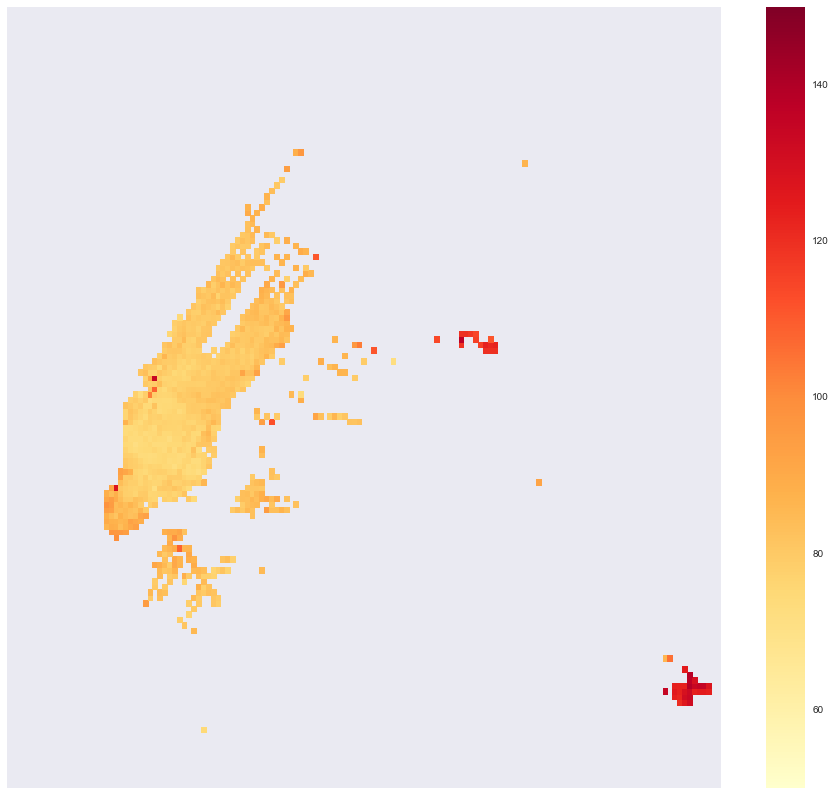

In [41]:
rcParams['figure.figsize'] = (16,14)

exp = new_bth[new_bth['pu_time']==21].pivot(index='pu_lat', columns='pu_lon', values='trip_value').iloc[::-1]
g = sns.heatmap(exp, cmap='YlOrRd', vmin=50, vmax=150)
g.axes.get_yaxis().set_visible(False)
g.axes.get_xaxis().set_visible(False)
#g.patch.set_facecolor('white')

/Users/robertogobbetti/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


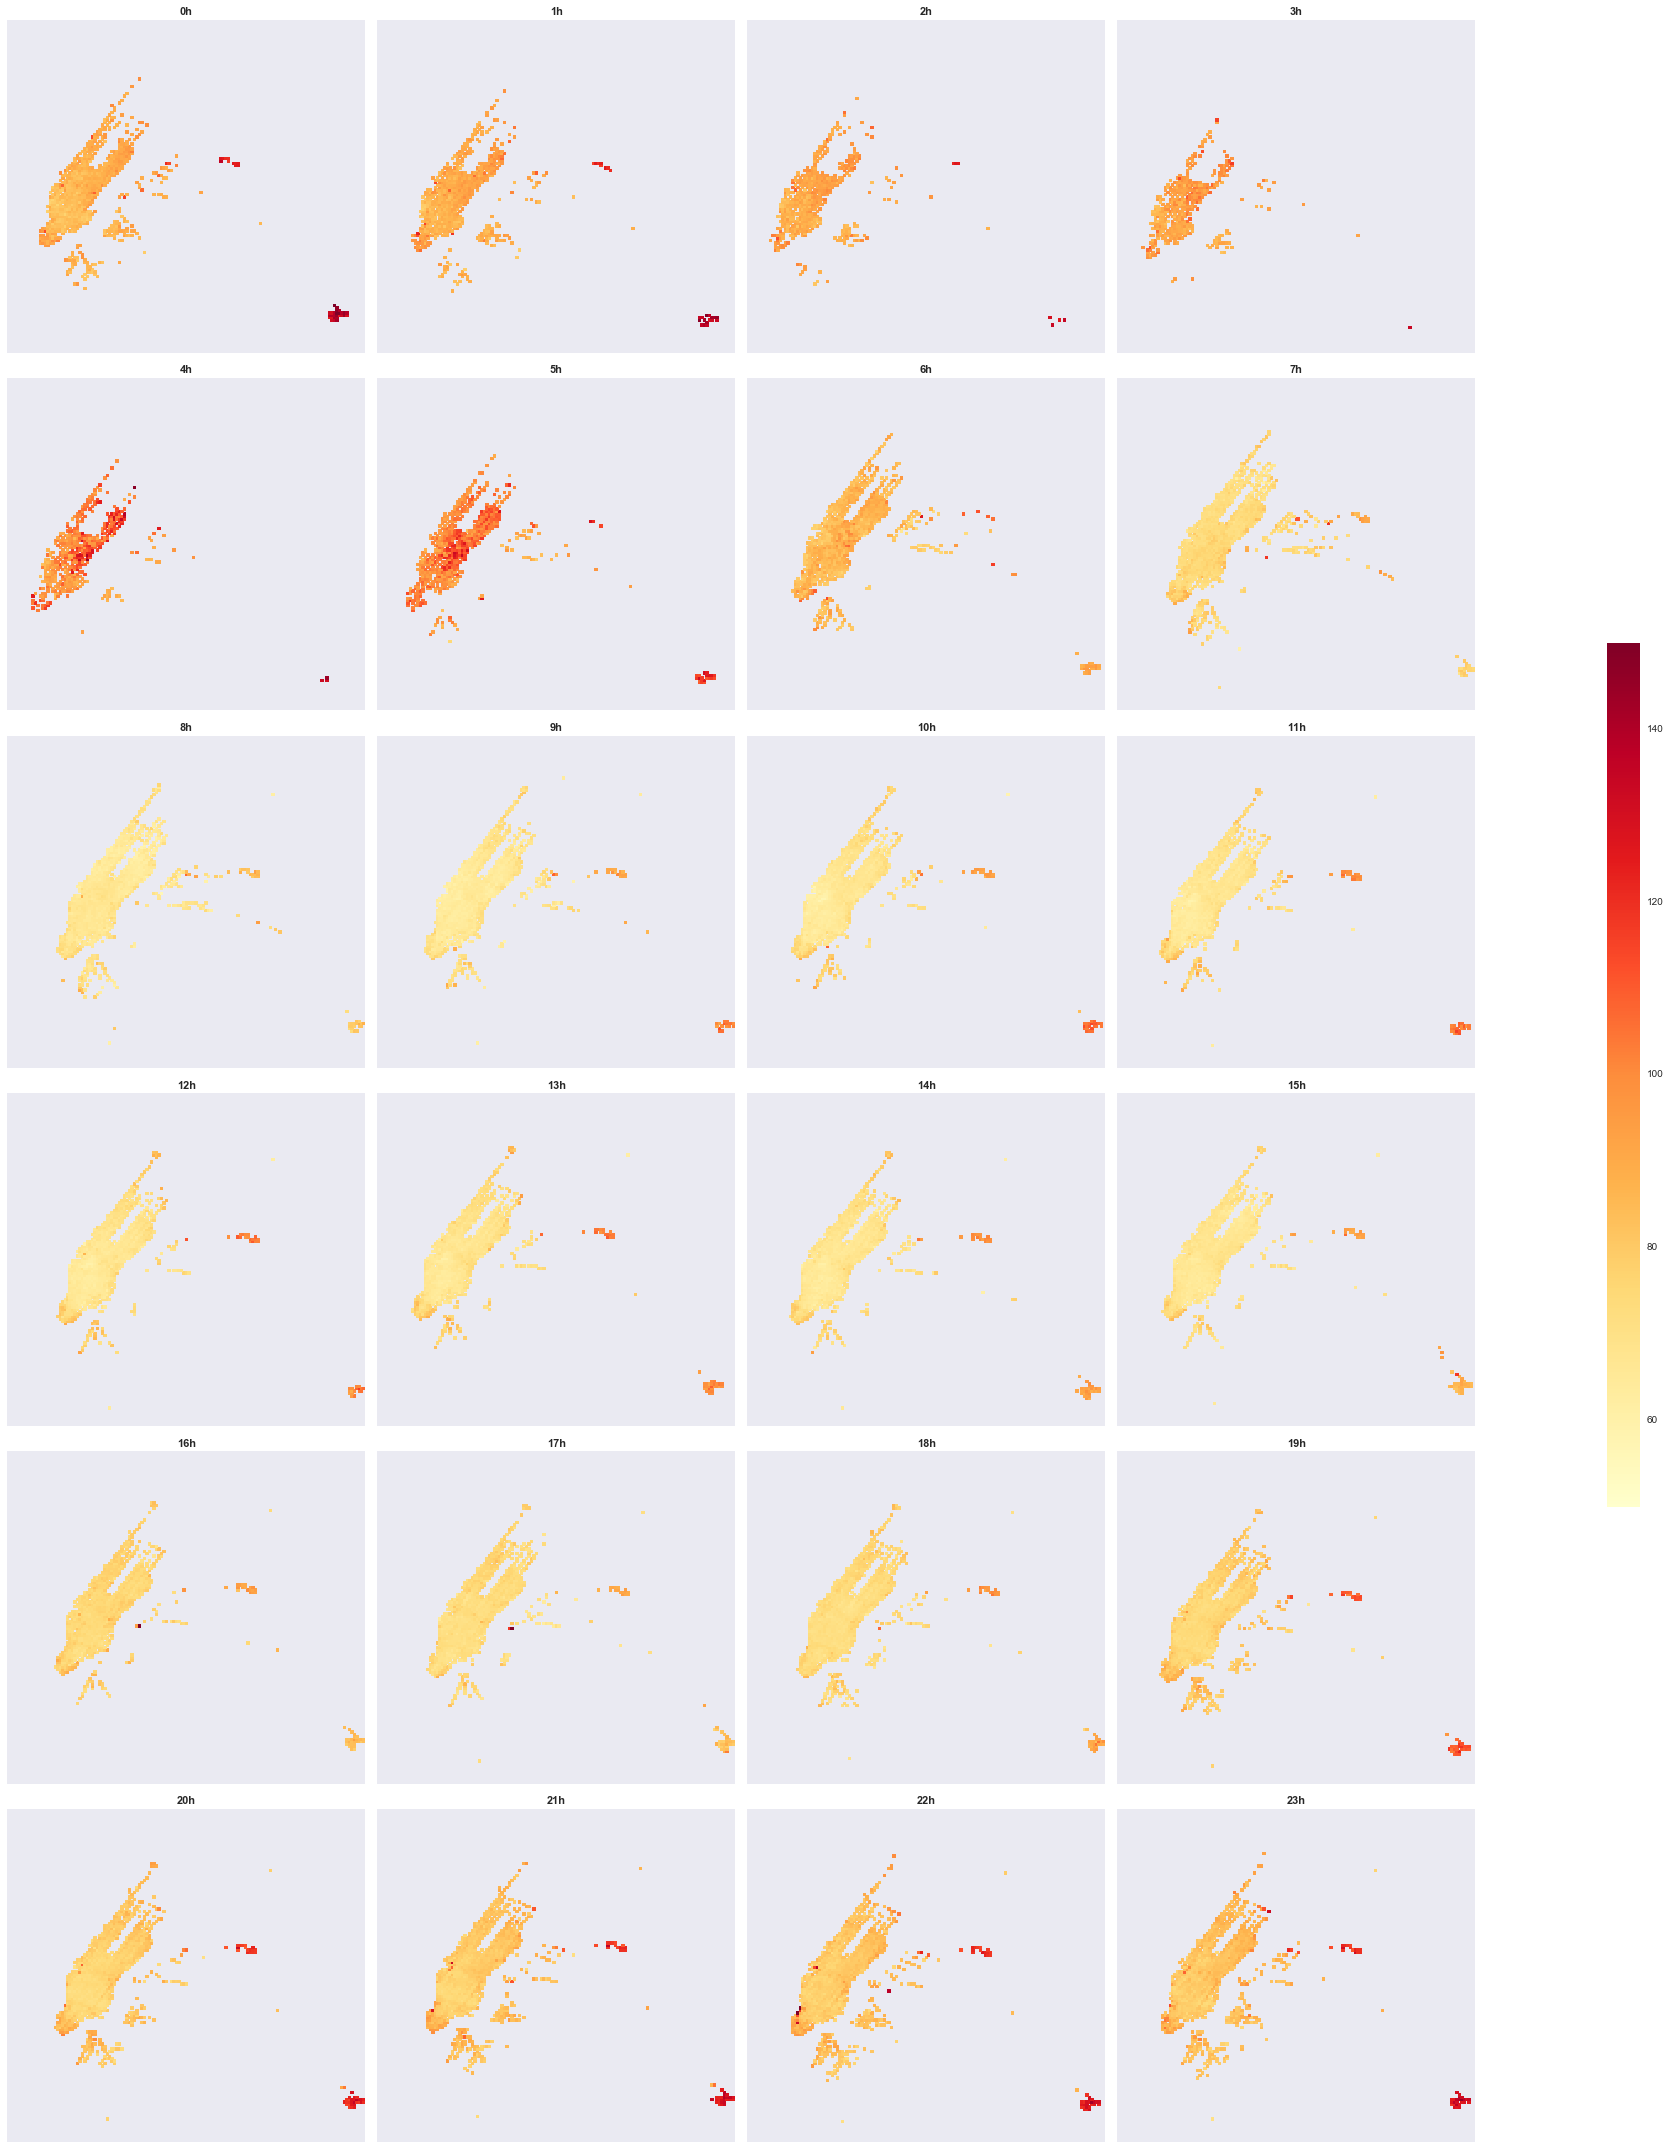

In [28]:
def facet(data,color,**kws):
    data = data.pivot(index='pu_lat', columns='pu_lon', values='trip_value').iloc[::-1]
    g = sns.heatmap(data, cmap='YlOrRd', **kws)
    g.axes.get_yaxis().set_visible(False)
    g.axes.get_xaxis().set_visible(False)
    #g.patch.set_facecolor('white')


with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(new_bth, col='pu_time', dropna=False, col_wrap=4, size=5, aspect=8.0/7.0)
    
    cbar_ax = g.fig.add_axes([.98, .3, .02, .4])
    g = g.map_dataframe(facet, cbar_ax=cbar_ax, vmin=50, vmax=150)

g.set_titles(col_template="{col_name}"+"h", fontweight='bold', fontsize=18)
g.fig.subplots_adjust(right=.9)

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
ds['holiday'] = ds.pu_time.map(lambda x: int(x.day in holidays)) #1=holiday, 0=workday

In [21]:
ds.head()

,medallion,pu_time,do_time,pu_lon,pu_lat,do_lon,do_lat,tot_amount,duration,holiday
0,895B94C2A676652890372A1DA0F5340A,2013-01-27 04:06:00,2013-01-27 04:22:00,-73.992729,40.725338,-73.952171,40.780514,25.700000,960,1
1,BBADB9E83DB1D9E01C5B09CC019A3B59,2013-01-08 17:41:00,2013-01-08 17:49:00,-73.979706,40.766026,-73.971725,40.781860,10.000000,480,0
2,EDC498F8AB44E4697ECB239CF11E001F,2013-01-13 14:57:00,2013-01-13 15:21:00,-73.976303,40.765518,-73.996658,40.715321,23.300000,1440,1
3,EC240A6DAE0C81C9CAA98649C9CD220B,2013-01-16 18:37:11,2013-01-16 18:43:41,-74.005943,40.735981,-73.992767,40.745438,9.409691,390,0
4,D6981DB303359568589744CDAF39237C,2013-01-09 20:32:00,2013-01-09 20:40:00,-74.004837,40.757092,-73.985382,40.753506,10.073625,480,0


In [22]:
sample = ds.sample(1000)

In [23]:
sample['hour'] = sample.pu_time.map(lambda x: x.hour)

In [24]:
sample['trip_value'] = sample['tot_amount'] / (sample['duration'] / 3600)

In [25]:
X = pd.concat([sample.hour,sample.duration,sample.holiday],1).as_matrix()

In [26]:
y= sample.trip_value.as_matrix()

In [27]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [28]:
forest.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [30]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.721235)
2. feature 0 (0.267896)
3. feature 2 (0.010869)


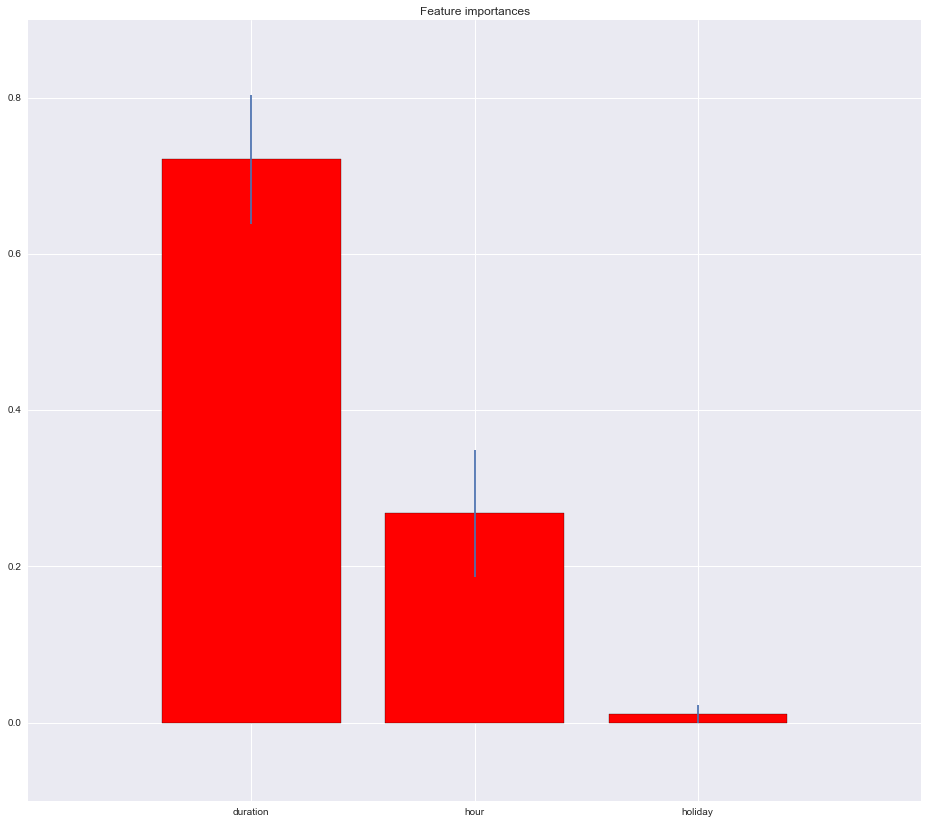

In [42]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ['duration','hour','holiday'])
plt.xlim([-1, X.shape[1]])
plt.show()